<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [188]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [171]:
data = pd.read_csv("../data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

STATE
MICHIGAN    118963.0
MICHIGAN    120049.0
MICHIGAN    123829.0
MICHIGAN    122266.0
MICHIGAN    127113.0
MICHIGAN    123229.0
MICHIGAN    127655.0
MICHIGAN    133215.0
MICHIGAN    134163.0
MICHIGAN    131673.0
MICHIGAN    131504.0
MICHIGAN    127659.0
MICHIGAN    125319.0
MICHIGAN    121830.0
MICHIGAN    120173.0
MICHIGAN    118931.0
MICHIGAN    117432.0
MICHIGAN    118702.0
MICHIGAN    115722.0
MICHIGAN    112465.0
MICHIGAN    112068.0
MICHIGAN    113420.0
MICHIGAN    110135.0
MICHIGAN    111267.0
MICHIGAN    111742.0
MICHIGAN    107851.0
MICHIGAN    110254.0
MICHIGAN    113656.0
MICHIGAN    116261.0
MICHIGAN    117560.0
MICHIGAN    119315.0
MICHIGAN    107959.0
MICHIGAN         NaN
Name: GRADES_4_G, dtype: float64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [172]:
data.nunique()

PRIMARY_KEY                     1715
STATE                             53
YEAR                              33
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1483
GRADES_KG_G                     1613
GRADES_4_G                      1612
GRADES_8_G                      1620
GRADES_12_G                     1608
GRADES_1_8_G                    1020
GRADES_9_12_G                   1070
GRADES_ALL_G                    1629
AVG_MATH_4_SCORE                  50
AVG_MATH_8_SCORE                  57
AVG_READING_4_SCORE               43
AVG_READING_8_SCORE               39
dtype: int64

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [173]:
dataI = data.set_index('STATE')
M = dataI.loc['MICHIGAN']
mScore = M["GRADES_4_G"]
averageM = np.mean(mScore)

O = dataI.loc['OHIO']
oScore = O["GRADES_4_G"]
averageO = np.mean(oScore)

print([averageO, "Ohio Average", averageM, "Michigan Average", "Ohio 4th graders clearly have the superior intellect"])

[134914.40625, 'Ohio Average', 119480.625, 'Michigan Average', 'Ohio 4th graders clearly have the superior intellect']


Find the average for your pedictor score across all states in 2019

In [174]:
dataA = data["GRADES_4_G"]
average = dataA.mean()
print(average)

69166.50796568628


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [175]:
dataS = data['STATE'].unique()
dataI = data.set_index('STATE')
state = 0
score = []
for state in range(51):
    maxG = max(dataI.loc[dataS[state]]["GRADES_4_G"])
    print(dataS[state],maxG)
    score.append(maxG)
    ++state

ALABAMA 60012.0
ALASKA 10926.0
ARIZONA 89184.0
ARKANSAS 38800.0
CALIFORNIA 493415.0
COLORADO 69784.0
CONNECTICUT 45307.0
DELAWARE 10838.0
DISTRICT_OF_COLUMBIA 6339.0
FLORIDA 220504.0
GEORGIA 138249.0
HAWAII 15703.0
IDAHO 24003.0
ILLINOIS 160495.0
INDIANA 82387.0
IOWA 37980.0
KANSAS 37692.0
KENTUCKY 52487.0
LOUISIANA 63884.0
MAINE 17419.0
MARYLAND 70330.0
MASSACHUSETTS 79385.0
MICHIGAN 134163.0
MINNESOTA 67226.0
MISSISSIPPI 41820.0
MISSOURI 71928.0
MONTANA 13009.0
NEBRASKA 24169.0
NEVADA 38624.0
NEW_HAMPSHIRE 17275.0
NEW_JERSEY 101704.0
NEW_MEXICO 26363.0
NEW_YORK 219305.0
NORTH_CAROLINA 122866.0
NORTH_DAKOTA 9614.0
OHIO 143373.0
OKLAHOMA 52385.0
OREGON 46543.0
PENNSYLVANIA 142366.0
RHODE_ISLAND 12717.0
SOUTH_CAROLINA 60890.0
SOUTH_DAKOTA 11116.0
TENNESSEE 78472.0
TEXAS 413843.0
UTAH 52970.0
VERMONT 8457.0
VIRGINIA 99305.0
WASHINGTON 87366.0
WEST_VIRGINIA 26266.0
WISCONSIN 65996.0
WYOMING 8269.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [176]:
#dataS = data['STATE'].unique()
#dataI = data.set_index('STATE')
#state = 0
#revenue = []
#for state in range(51):
 #   average = np.mean(dataI.loc[dataS[state]]["TOTAL_REVENUE"])
  #  print(dataS[state],average)
   # revenue.append(average)
    #++state
    

#print("I chose average revenue because factors like quality of life outside of school can also affect children's development and ability to score highly on tests")
data['percentage'] = data['INSTRUCTION_EXPENDITURE']/data['TOTAL_EXPENDITURE']
data['percentage']

0       0.558333
1       0.512461
2       0.422130
3       0.553248
4       0.529091
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: percentage, Length: 1715, dtype: float64

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='GRADES_4_G'>

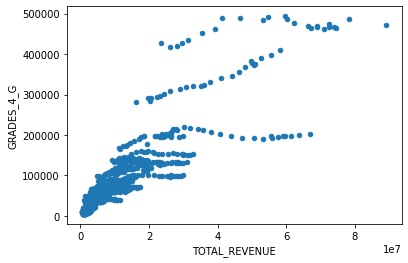

In [177]:
data.plot.scatter(x = "TOTAL_REVENUE", y = "GRADES_4_G")

A comparison between total revenue of a state and the resulting grades. As you can see, total revenue expenditure is likely to correlate with high grades in fourth grade, and there is a strong correlation as total revenue drops below a certain threshhold, around 35 million dollars. 

**Visualization 2**

<AxesSubplot:xlabel='percentage', ylabel='GRADES_4_G'>

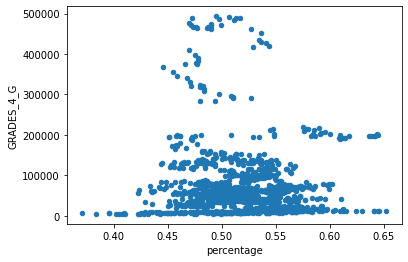

In [178]:
data.plot.scatter(x = "percentage", y = "GRADES_4_G")

In terms of percentage of revenue that is dedicated to funding education, it shows that most states devote between 0.4 and 0.65 of their total revenue. Interestingly, the resulting plot is somewhat of a bell curve, with a slight bias towards higher percentages of revenue to funding.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
cleared = data.dropna()
tr = cleared['INSTRUCTION_EXPENDITURE']
p = cleared['percentage']
X = cleared[['INSTRUCTION_EXPENDITURE','percentage']]
y = cleared["GRADES_4_G"]
X

,INSTRUCTION_EXPENDITURE,percentage
561,2817111.0,0.531638
562,763525.0,0.474154
563,2810907.0,0.452621
564,1768713.0,0.545428
565,29561563.0,0.494755
...,...,...
1219,8755896.0,0.543399
1220,6508964.0,0.477542
1221,1819903.0,0.524924
1222,5723474.0,0.495381


In [181]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [182]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [183]:
# create your model here
model = LinearRegression()

In [184]:
model.fit(X_train, y_train)

LinearRegression()

In [185]:
y_pred = model.predict(X_test)

In [186]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Grade 4 Scores')

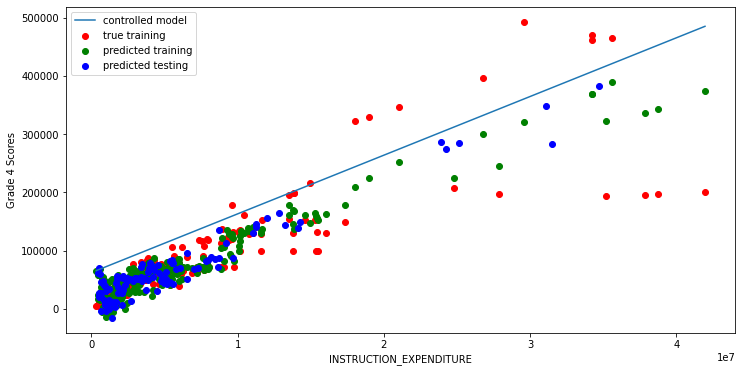

In [189]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Grade 4 Scores")

<h2> Summary </h2>

Finally, after hours of incorrect syntax, confusing error messages, and rage inducing google searches, I have achieved inner peace. Anyways, what I think I did was look to see if there was a link between the percentage of a state's education in comparison to its overall revenue, as well as total instruction expenditure and 4th grader's scores. Unshockingly, the states with more instruction expenditure showed the highest scores, while percentages of the total revenue had a more unusual bell curve, suggesting that extremely rich states could get away with the same total instruction expenditure as lower total revenue states. As for my linear regression model, it seems to correlate with the intruction expenditure statement, showing how low instruction expenditure is linked with lower scores, while there is a general trend for higher scores with more instruction expenditure.